# Demonstrating classification algorithms on the Iris data set
Author: David Dvorak

Date: July 2021

https://github.com/djdvorak

## Setup
### Imports
Import libraries, datasets and set figures styles

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import scipy.optimize
plt.rcParams['figure.figsize'] = (12.0, 10.0)
sns.set(font_scale=1.25)
sns.set_style("whitegrid")

This classification demonstration will make use of the Iris dataset created by R. A. Fisher. This classic dataset provides 4 features of the 3 classes of Iris flower: setosa, virginica and versicolor. One class is linearly separable while the other two classes are not linearly separable. 

Iris Setosa |  Iris Virginica |  Iris Versicolor
:-------------------------:|:-------------------------:|:-------------------------:
![Iris Setosa](iris_setosa2.jpg) | ![Iris Virginica](iris_virginica.jpg) | ![Iris Versicolor](iris_versicolor.jpg)

### Load Data

In [2]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=1)

### Label and view

In [3]:
# Add column names
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris_df['Class'] = pd.Categorical(iris.target, categories=[0,1,2]).rename_categories(['Setosa', 'Versicolour', 'Virginica'])

In [4]:
# Put training data into dataframe for visualizations
iris_train_df = pd.DataFrame(X_train)
iris_train_df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris_train_df['Class'] = pd.Categorical(y_train, categories=[0,1,2]).rename_categories(['Setosa', 'Versicolour', 'Virginica'])
iris_train_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,4.8,3.4,1.6,0.2,Setosa
1,5.7,2.5,5.0,2.0,Virginica
2,6.3,2.7,4.9,1.8,Virginica
3,4.8,3.0,1.4,0.1,Setosa
4,4.7,3.2,1.3,0.2,Setosa


In [5]:
# Put test data into dataframe for visualizations
iris_test_df = pd.DataFrame(X_test)
iris_test_df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris_test_df['Class'] = pd.Categorical(y_test, categories=[0,1,2]).rename_categories(['Setosa', 'Versicolour', 'Virginica'])
iris_test_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.8,4.0,1.2,0.2,Setosa
1,5.1,2.5,3.0,1.1,Versicolour
2,6.6,3.0,4.4,1.4,Versicolour
3,5.4,3.9,1.3,0.4,Setosa
4,7.9,3.8,6.4,2.0,Virginica


## Exploration
We can use the describe function to get a sense fore the size and distribution of the data set

In [6]:
iris_df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A Seaborn pairplot lets us get a quick overview of the data and how it is correlated.

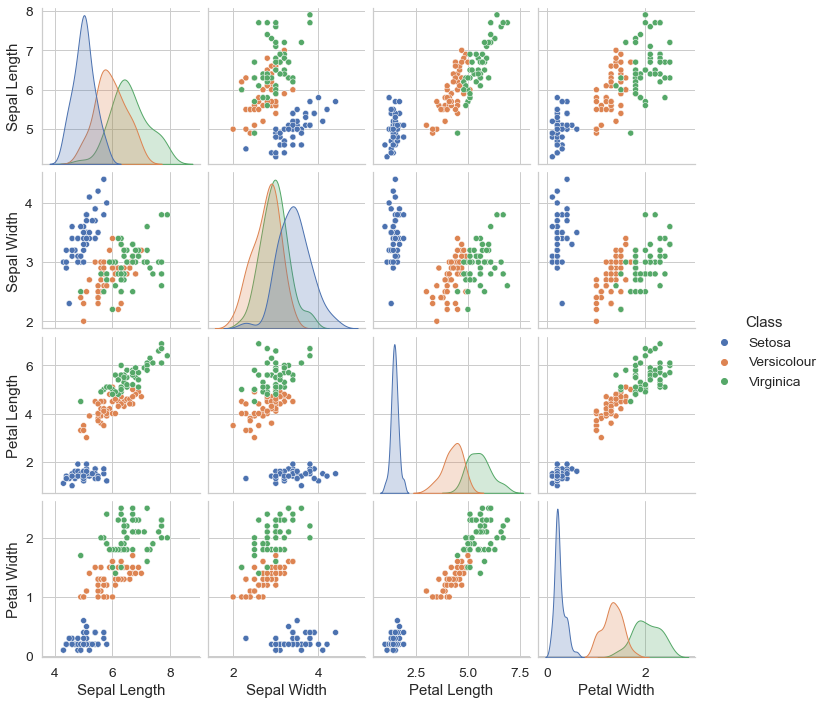

In [7]:
sns.pairplot(iris_df, hue='Class', vars=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], diag_kind='kde')

## Classification
In this section we will classify the data using several different algorithms and our train and test subsets.

In [30]:
alg_accuracy_scores = {}

### Logistic Regression

In [31]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_labels_test = clf.predict(X_test)
iris_test_df['LogisticRegression'] = y_labels_test

In [32]:
score = accuracy_score(y_test,y_labels_test)
alg_accuracy_scores['LogisticRegression'] = score
print("The accuracy score of this algorithm on the test data is {:.2f} %.".format(100*score))

The accuracy score of this algorithm on the test data is 96.67 %.


In [33]:
iris_test_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class,LogisticRegression,KMeans,KNN,SVC
0,5.8,4.0,1.2,0.2,Setosa,0,0,0,0
1,5.1,2.5,3.0,1.1,Versicolour,1,1,1,1
2,6.6,3.0,4.4,1.4,Versicolour,1,1,1,1
3,5.4,3.9,1.3,0.4,Setosa,0,0,0,0
4,7.9,3.8,6.4,2.0,Virginica,2,2,2,2


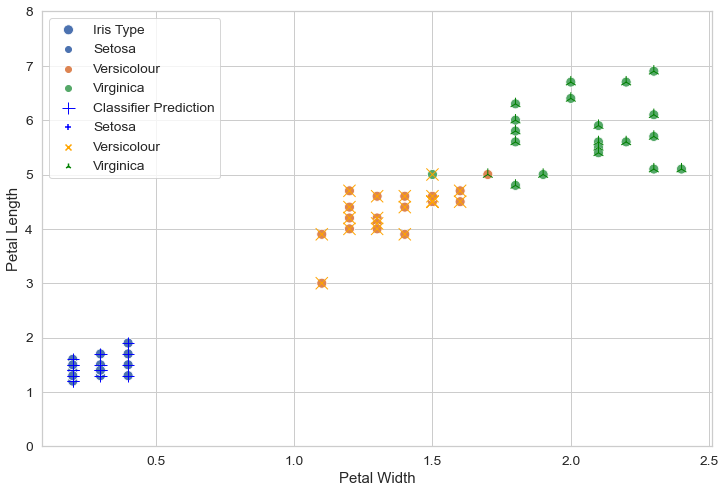

In [11]:
fig, ax = plt.subplots(1,1,figsize=[12,8])
sns.set_palette('deep')
sns.scatterplot(x="Petal Width", y="Petal Length", hue="Class", s=100, data=iris_test_df, ax=ax)
palette = ['blue', 'orange', 'green']
sns.scatterplot(x="Petal Width", y="Petal Length", hue="LogisticRegression", style="LogisticRegression", s=150, palette = palette, data=iris_test_df, ax=ax, markers=['+','x','2'])
ax.set_ylim([0,8])
ax.legend(['Iris Type', 'Setosa','Versicolour', 'Virginica', 'Classifier Prediction','Setosa','Versicolour','Virginica'])

### K Means

In [34]:
n_clusters = len(np.unique(y_train))
clf = KMeans(n_clusters = n_clusters, random_state=1)
clf.fit(X_train)
y_labels_train = clf.labels_
y_labels_test = clf.predict(X_test)
iris_test_df['KMeans'] = y_labels_test

In [35]:
score = accuracy_score(y_test,y_labels_test)
alg_accuracy_scores['KMeans'] = score
print("The accuracy score of this algorithm on the test data is {:.2f} %.".format(100*score))

The accuracy score of this algorithm on the test data is 43.33 %.


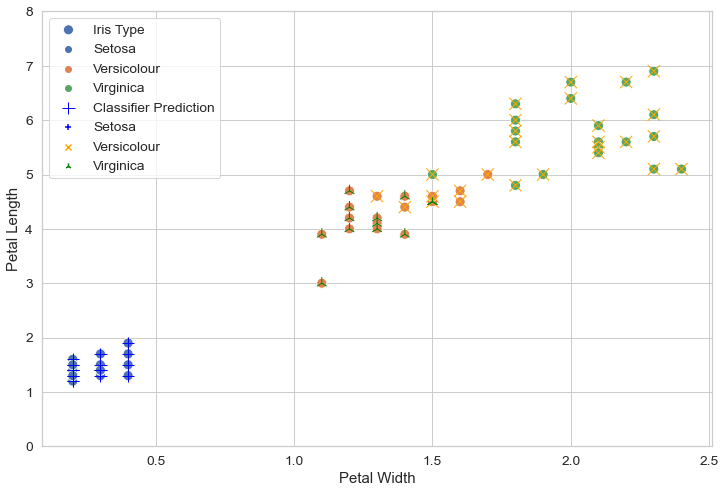

In [36]:
fig, ax = plt.subplots(1,1,figsize=[12,8])
sns.set_palette('deep')
sns.scatterplot(x="Petal Width", y="Petal Length", hue="Class", s=100, data=iris_test_df, ax=ax)
palette = ['blue', 'orange', 'green']
sns.scatterplot(x="Petal Width", y="Petal Length", hue="KMeans", style="KMeans", s=150, palette = palette, data=iris_test_df, ax=ax, markers=['+','x','2'])
ax.set_ylim([0,8])
ax.legend(['Iris Type', 'Setosa','Versicolour', 'Virginica', 'Classifier Prediction','Setosa','Versicolour','Virginica'])

We can see in the plot above that the classifier predictions are actually fairly good, but it's the labels that are refering to the wrong group. This incorrect labeling of the classes leads to the lower accuracy score. Since the assignment labels do not match with the test data set they will need to be swapped so that they match with the correct iris species in the test data set. To accomplish this we will use the Hungarian algorithm through the linear_sum_assignment function.

In [37]:
def relabel_clusters(y_test, y_predicted, n_clusters = None):
    if n_clusters is None:
        n_clusters = (
            max(y_predicted.max(), y_test.max()) + 1
        )  # we make the assumption that labels are 0-indexed
        
    count_matrix = np.zeros((n_clusters, n_clusters), dtype=np.int64)
    for i in range(y_predicted.size):
        count_matrix[y_predicted[i], y_test[i]] += 1

    row_ind, col_ind = scipy.optimize.linear_sum_assignment(count_matrix.max() - count_matrix)
    reassignment = dict(zip(row_ind, col_ind))
    
    y_predicted_reassigned = np.zeros_like(y_predicted)
    for key in reassignment:
        y_predicted_reassigned[y_predicted==key] = reassignment[key]

    return y_predicted_reassigned

In [38]:
y_labels_test_relabeled = relabel_clusters(y_test, y_labels_test)
iris_test_df['KMeans'] = y_labels_test_relabeled
score = accuracy_score(y_test,y_labels_test_relabeled)
alg_accuracy_scores['KMeans'] = score
print("The accuracy score of this algorithm on the test data is {:.2f} %.".format(100*score))

The accuracy score of this algorithm on the test data is 88.33 %.


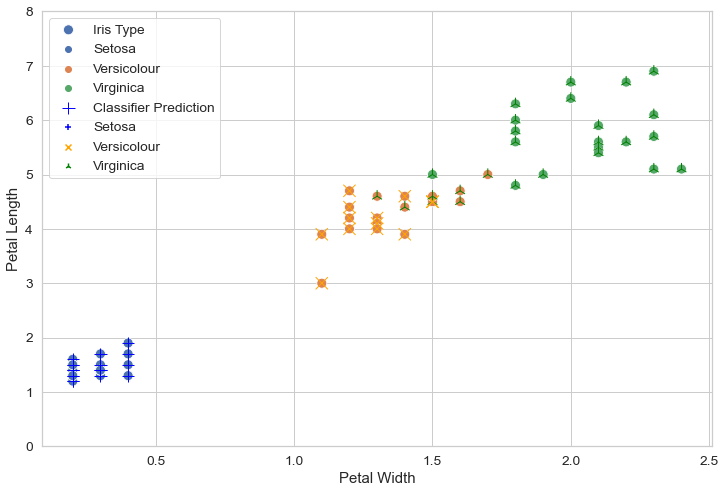

In [39]:
fig, ax = plt.subplots(1,1,figsize=[12,8])
sns.set_palette('deep')
sns.scatterplot(x="Petal Width", y="Petal Length", hue="Class", s=100, data=iris_test_df, ax=ax)
palette = ['blue', 'orange', 'green']
sns.scatterplot(x="Petal Width", y="Petal Length", hue="KMeans", style="KMeans", s=150, palette = palette, data=iris_test_df, ax=ax, markers=['+','x','2'])
ax.set_ylim([0,8])
ax.legend(['Iris Type', 'Setosa','Versicolour', 'Virginica', 'Classifier Prediction','Setosa','Versicolour','Virginica'])

We can see that the accuracy score has increased after reassigning the cluster labels and the plot also shows that the cluster labels and iris species are now matching correctly.

### K Nearest Neighbours

In [40]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_labels_test = clf.predict(X_test)
iris_test_df['KNN'] = y_labels_test

In [41]:
score = accuracy_score(y_test,y_labels_test)
alg_accuracy_scores['KNN'] = score
print("The accuracy score of this algorithm on the test data is {:.2f} %.".format(100*score))

The accuracy score of this algorithm on the test data is 98.33 %.


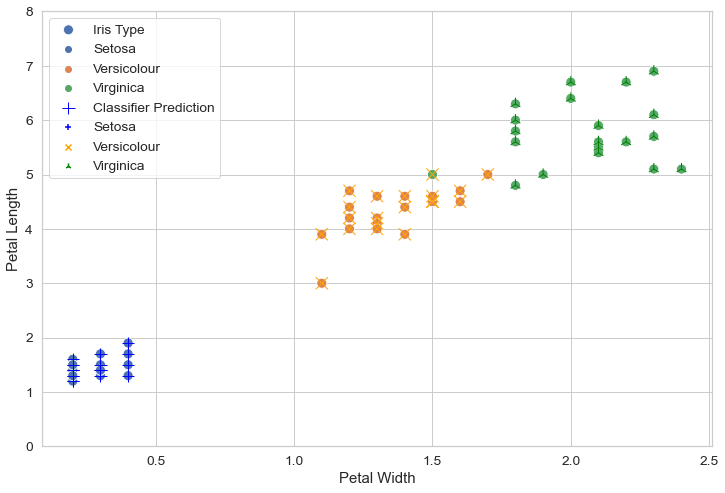

In [42]:
fig, ax = plt.subplots(1,1,figsize=[12,8])
sns.set_palette('deep')
sns.scatterplot(x="Petal Width", y="Petal Length", hue="Class", s=100, data=iris_test_df, ax=ax)
palette = ['blue', 'orange', 'green']
sns.scatterplot(x="Petal Width", y="Petal Length", hue="KNN", style="KNN", s=150, palette = palette, data=iris_test_df, ax=ax, markers=['+','x','2'])
ax.set_ylim([0,8])
ax.legend(['Iris Type', 'Setosa','Versicolour', 'Virginica', 'Classifier Prediction','Setosa','Versicolour','Virginica'])

### Support Vector Classification (SVC)

In [43]:
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', degree = 4, gamma='auto')) #gamma='auto')) #SVC(kernel='poly', degree = 4)
clf.fit(X_train, y_train)
y_labels_test = clf.predict(X_test)
iris_test_df['SVC'] = y_labels_test

In [44]:
score = accuracy_score(y_test,y_labels_test)
alg_accuracy_scores['SVC'] = score
print("The accuracy score of this algorithm on the test data is {:.2f} %.".format(100*score))

The accuracy score of this algorithm on the test data is 96.67 %.


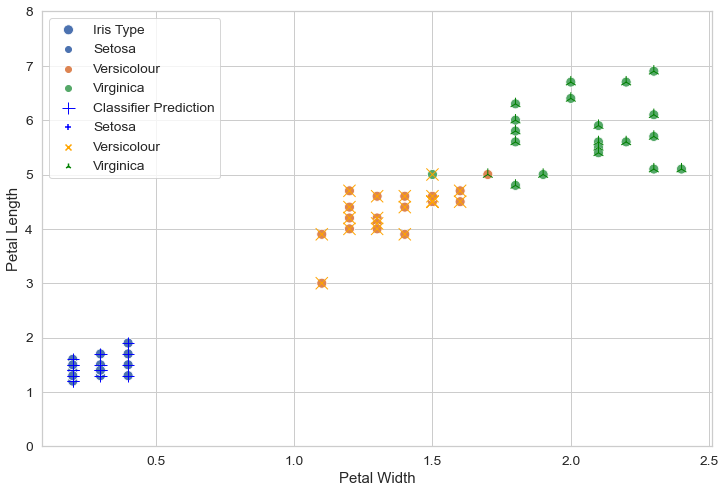

In [45]:
fig, ax = plt.subplots(1,1,figsize=[12,8])
sns.set_palette('deep')
sns.scatterplot(x="Petal Width", y="Petal Length", hue="Class", s=100, data=iris_test_df, ax=ax)
palette = ['blue', 'orange', 'green']
sns.scatterplot(x="Petal Width", y="Petal Length", hue="SVC", style="SVC", s=150, palette = palette, data=iris_test_df, ax=ax, markers=['+','x','2'])
ax.set_ylim([0,8])
ax.legend(['Iris Type', 'Setosa','Versicolour', 'Virginica', 'Classifier Prediction','Setosa','Versicolour','Virginica'])

### Gaussian Naive Bayes

In [46]:
# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
y_labels_test = unscaled_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
#print('\nPrediction accuracy for the normal test dataset with PCA')
#print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']

# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 2 without scaling:\n', pca.components_[1])

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

iris_df['gaussianNB'] = unscaled_clf.predict(iris.data)



PC 1 without scaling:
 [ 0.35807439 -0.0682053   0.85345413  0.37248733]

PC 2 without scaling:
 [ 0.58721981  0.79066884 -0.17097735 -0.02797207]


In [47]:
score = accuracy_score(y_test,y_labels_test)
alg_accuracy_scores['gaussianNB'] = score
print("The accuracy score of this algorithm on the test data is {:.2f} %.".format(100*score))

The accuracy score of this algorithm on the test data is 95.00 %.


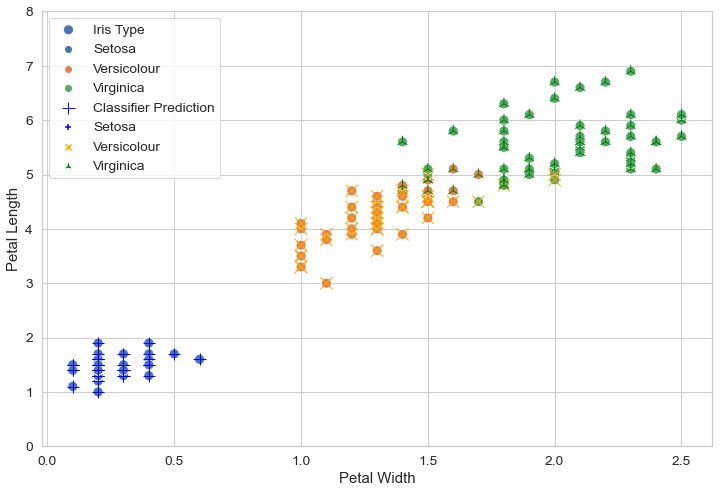

In [48]:
fig, ax = plt.subplots(1,1,figsize=[12,8])
sns.set_palette('deep')
g = sns.scatterplot(x="Petal Width", y="Petal Length", hue="Class", s=100, data=iris_df, ax=ax)
palette = ['blue', 'orange', 'green']
h = sns.scatterplot(x="Petal Width", y="Petal Length", hue="gaussianNB", style="gaussianNB", s=150, palette = palette, data=iris_df, ax=ax, markers=['+','x','2'])
ax.set_ylim([0,8])
ax.legend(['Iris Type', 'Setosa','Versicolour', 'Virginica', 'Classifier Prediction','Setosa','Versicolour','Virginica'])

## Conclusion

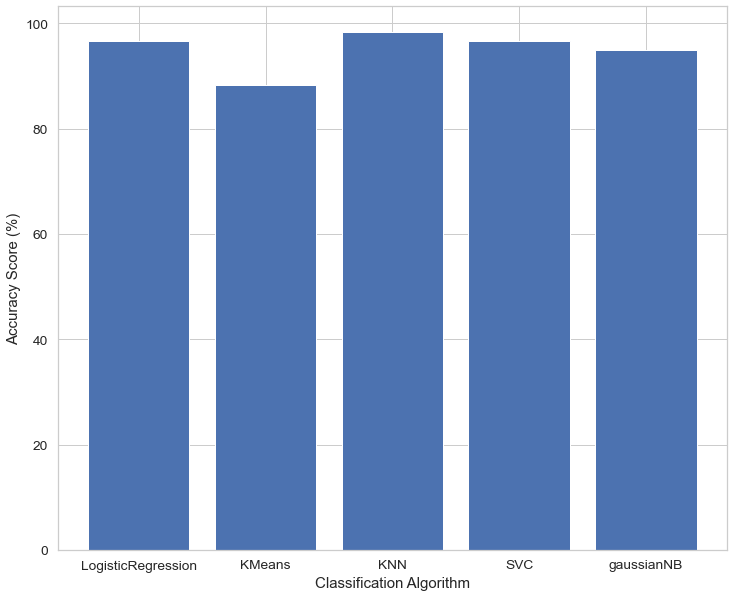

In [62]:
names = list(alg_accuracy_scores.keys())
values = list([100*x for x in alg_accuracy_scores.values()])

plt.bar(range(len(alg_accuracy_scores)), values, tick_label=names)
plt.xlabel("Classification Algorithm")
plt.ylabel("Accuracy Score (%)")
plt.show()

In conclusion, we can see that each of the selected classificatino algorithms performs quite well on the small Iris data set. The K-means clustering algorithm performed the poorest and the K-nearest neighbours algorithm performed the best. Hopefully this has been a helpful overview of how to apply a range of algorithms to classify data.